In [49]:
!pip install pandas

1213

In [26]:
import numpy as np
import pandas
!pip install nltk
import nltk
import re, random, os
import string, pprint
import matplotlib.pyplot as plt
import seaborn as sns

# spacy for basic preprocessing, optional, can use nltk as well (lemmatisation etc.)
import spacy

# gensim for LDA
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
#from pyLDAvis import gensim_models as pg
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [27]:
df = pandas.read_csv('/content/drive/MyDrive/7817_1.csv')
print(df.shape)
df.head()

(1597, 27)


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [28]:
# filter for product id = amazon echo
df = df[df['asins']=="B01BH83OOM"]
print(df.shape)
df.head()

(542, 27)


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
852,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,"https://www.amazon.com/dp/B01BH83OOM,https://w...",IMPORTANT UPDATE (3/8/17): As you read my orig...,"The Echo's Little Sister Is AMAZING!! 3,",NaN,NaN,Deanokat,NaN,8.416670e+11,1.75 lbs
853,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,"https://www.amazon.com/dp/B01BH83OOM,https://w...",It was just a few weeks ago that I was bemoani...,Tap Alexa on the go!,NaN,NaN,Heather A,NaN,8.416670e+11,1.75 lbs
854,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,"https://www.amazon.com/dp/B01BH83OOM,https://w...",The Amazon Tap is a portable Bluetooth speaker...,Amazon Tap Review - Best Bluetooth Speaker in ...,NaN,NaN,Quentin Moore,NaN,8.416670e+11,1.75 lbs
855,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,http://reviews.bestbuy.com/3545/5097300/review...,Look at this product as a portable speaker fir...,Great for what it does,NaN,NaN,Casey,NaN,8.416670e+11,1.75 lbs
856,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,http://reviews.bestbuy.com/3545/5097300/review...,This Amazon tap is not only a great Bluetooth ...,"Awesome, smart little portable speaker",NaN,NaN,Tazman3582,NaN,8.416670e+11,1.75 lbs


In [29]:
# tokenize using gensim simple_preprocess
def sent_to_words(sentences, deacc=True): # deacc=True removes punctuations
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))


# convert to list
data = df['reviews.text'].values.tolist()
data_words = list(sent_to_words(data))

# sample
print(data_words[3])

['look', 'at', 'this', 'product', 'as', 'portable', 'speaker', 'first', 'and', 'an', 'echo', 'replacement', 'second', 'the', 'big', 'reason', 'to', 'buy', 'this', 'over', 'standard', 'bluetooth', 'speakers', 'is', 'this', 'has', 'wifi', 'streaming', 'enabled', 'when', 'you', 'are', 'at', 'home', 'you', 'can', 'stream', 'music', 'with', 'ease', 'to', 'it', 'voice', 'recognition', 'is', 'top', 'notch', 'and', 'it', 'really', 'shines', 'when', 'using', 'it', 'with', 'other', 'smart', 'home', 'accessories', 'the', 'only', 'problem', 'is', 'having', 'to', 'tap', 'the', 'microphone', 'button', 'for', 'it', 'to', 'listen', 'to', 'your', 'voice', 'if', 'you', 'want', 'bigger', 'sound', 'and', 'always', 'listening', 'features', 'spend', 'the', 'extra', 'money', 'on', 'the', 'amazon', 'echo']


In [30]:
# create list of stop words
# string.punctuation (from the 'string' module) contains a list of punctuations
nltk.download('stopwords')
stop_words = stopwords.words('english') + list(string.punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# functions for removing stopwords and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [32]:
# call functions

# remove stop words
data_words_nostops = remove_stopwords(data_words)

# initialize spacy 'en' model, use only tagger since we don't need parsing or NER
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[3])

['look', 'product', 'portable', 'speaker', 'second', 'big', 'reason', 'buy', 'standard', 'wifi', 'streaming', 'enable', 'home', 'stream', 'music', 'ease', 'voice', 'recognition', 'top', 'notch', 'really', 'shine', 'use', 'smart', 'home', 'accessory', 'problem', 'tap', 'microphone', 'button', 'listen', 'voice', 'want', 'big', 'sound', 'always', 'listen', 'feature', 'spend', 'extra', 'money']


In [33]:
# compare the nostop, lemmatised version with the original one
# note that speakers is lemmatised to speaker;
print(' '.join(data_words[3]), '\n')
print(' '.join(data_lemmatized[3]))

look at this product as portable speaker first and an echo replacement second the big reason to buy this over standard bluetooth speakers is this has wifi streaming enabled when you are at home you can stream music with ease to it voice recognition is top notch and it really shines when using it with other smart home accessories the only problem is having to tap the microphone button for it to listen to your voice if you want bigger sound and always listening features spend the extra money on the amazon echo 

look product portable speaker second big reason buy standard wifi streaming enable home stream music ease voice recognition top notch really shine use smart home accessory problem tap microphone button listen voice want big sound always listen feature spend extra money


In [34]:
# create dictionary and corpus
# create dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create corpus
corpus = [id2word.doc2bow(text) for text in data_lemmatized]

# sample
print(corpus[2])

[(3, 2), (13, 2), (16, 2), (17, 3), (20, 2), (24, 4), (29, 1), (31, 1), (35, 1), (48, 2), (51, 1), (56, 1), (60, 5), (70, 1), (82, 1), (85, 5), (88, 1), (90, 2), (95, 1), (96, 1), (97, 2), (99, 2), (100, 1), (108, 2), (112, 1), (116, 1), (120, 1), (128, 2), (131, 1), (134, 1), (141, 1), (142, 1), (143, 2), (144, 1), (145, 1), (146, 1), (147, 1), (148, 1), (149, 1), (150, 1), (151, 1), (152, 1), (153, 1), (154, 2), (155, 1), (156, 1), (157, 1), (158, 1), (159, 1), (160, 1), (161, 1), (162, 1), (163, 2), (164, 1), (165, 1), (166, 3), (167, 1), (168, 1), (169, 1), (170, 1), (171, 1), (172, 1), (173, 1), (174, 1), (175, 1), (176, 1), (177, 1), (178, 1), (179, 2), (180, 1), (181, 1), (182, 2), (183, 2), (184, 5), (185, 1), (186, 3), (187, 2), (188, 1), (189, 3), (190, 1), (191, 1), (192, 1), (193, 1), (194, 6), (195, 1), (196, 1), (197, 2), (198, 1), (199, 2), (200, 1), (201, 1), (202, 1), (203, 1), (204, 1), (205, 1), (206, 2), (207, 1), (208, 1), (209, 2), (210, 1)]


In [35]:
# human-readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('admit', 1),
  ('alexa', 1),
  ('allow', 1),
  ('amazon', 1),
  ('announce', 1),
  ('answer', 1),
  ('anyway', 1),
  ('app', 2),
  ('appealing', 1),
  ('associate', 1),
  ('avid', 1),
  ('aware', 1),
  ('back', 1),
  ('battery', 3),
  ('buy', 1),
  ('choose', 2),
  ('command', 1),
  ('control', 1),
  ('convenience', 1),
  ('cook', 1),
  ('day', 1),
  ('decide', 2),
  ('demand', 1),
  ('development', 1),
  ('device', 3),
  ('dot', 1),
  ('drain', 1),
  ('early', 2),
  ('easily', 2),
  ('echo', 1),
  ('enable', 1),
  ('especially', 1),
  ('fabulous', 1),
  ('financial', 1),
  ('firmware', 1),
  ('first', 1),
  ('free', 6),
  ('get', 1),
  ('give', 1),
  ('go', 1),
  ('hand', 6),
  ('high', 1),
  ('hope', 1),
  ('important', 1),
  ('introduce', 1),
  ('keep', 1),
  ('kitchen', 1),
  ('lack', 1),
  ('life', 1),
  ('listener', 1),
  ('little', 2),
  ('lot', 1),
  ('love', 1),
  ('major', 1),
  ('make', 1),
  ('maximum', 1),
  ('microphone', 1),
  ('mind', 1),
  ('minimal', 1),
  ('mode',

In [36]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [37]:
# print the 10 topics
pprint.pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.068*"amazing" + 0.033*"easy" + 0.031*"little" + 0.030*"super" + '
  '0.026*"sync" + 0.024*"able" + 0.022*"beach" + 0.021*"weather" + '
  '0.017*"difficult" + 0.016*"assistant"'),
 (1,
  '0.061*"easy" + 0.057*"sound" + 0.043*"portability" + 0.038*"buy" + '
  '0.037*"echo" + 0.035*"feature" + 0.028*"house" + 0.028*"quality" + '
  '0.020*"need" + 0.020*"room"'),
 (2,
  '0.064*"loud" + 0.044*"decent" + 0.042*"expensive" + 0.035*"capability" + '
  '0.031*"glad" + 0.023*"upgrade" + 0.022*"mother" + 0.018*"issue" + '
  '0.015*"size" + 0.015*"online"'),
 (3,
  '0.043*"enjoy" + 0.039*"talk" + 0.033*"button" + 0.030*"alexa" + '
  '0.024*"thing" + 0.024*"fun" + 0.022*"put" + 0.021*"tap" + 0.020*"hold" + '
  '0.020*"lot"'),
 (4,
  '0.057*"great" + 0.048*"speaker" + 0.043*"use" + 0.037*"sound" + 0.035*"tap" '
  '+ 0.032*"love" + 0.031*"good" + 0.031*"music" + 0.028*"alexa" + '
  '0.026*"work"'),
 (5,
  '0.070*"set" + 0.037*"start" + 0.034*"actually" + 0.030*"radio" + '
  '0.027*"come" + 0

In [38]:
# coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4395692084830964


In [51]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [40]:
# compute coherence value at various values of alpha and num_topics
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):

    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics,
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))


    return model_list, coherence_values

In [41]:
# build models across a range of num_topics and alpha
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 1]
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=data_lemmatized,
                                                        num_topics_range=num_topics_range,
                                                        alpha_range=alpha_range)

In [42]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.01,2,0.495424
1,0.01,6,0.440773
2,0.01,10,0.407164
3,0.01,15,0.417828
4,0.01,20,0.406180
5,0.10,2,0.476269
6,0.10,6,0.428164
7,0.10,10,0.432584
8,0.10,15,0.408156
9,0.10,20,0.423234


In [43]:
coherence_df.sort_values('coherence_value')

,alpha,num_topics,coherence_value
4,0.01,20,0.406180
2,0.01,10,0.407164
8,0.10,15,0.408156
3,0.01,15,0.417828
9,0.10,20,0.423234
6,0.10,6,0.428164
7,0.10,10,0.432584
1,0.01,6,0.440773
11,1.00,6,0.448491
12,1.00,10,0.463875


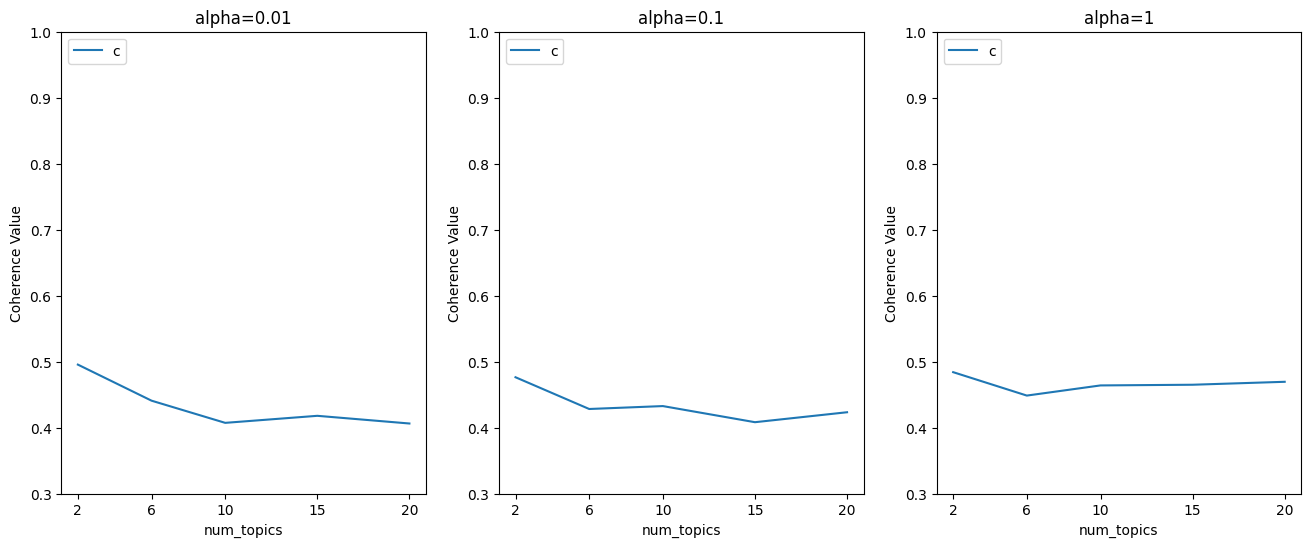

In [44]:
# plot
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))

    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(1, 3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.30, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df, alpha_range, num_topics_range)

In [45]:
#Finally building the LDA Model by selecting

Final_LDA_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                  id2word=id2word,
                                                  num_topics=6,
                                                  random_state=100,
                                                  update_every=1,
                                                  chunksize=100,
                                                  passes=10,
                                                  alpha=1,
                                                  per_word_topics=True)

In [46]:
# print the 10 topics
pprint.pprint(Final_LDA_model.print_topics())
doc_lda = Final_LDA_model[corpus]

[(0,
  '0.068*"use" + 0.029*"enjoy" + 0.026*"able" + 0.023*"question" + '
  '0.021*"little" + 0.018*"hand" + 0.016*"app" + 0.015*"free" + 0.015*"ask" + '
  '0.014*"alexa"'),
 (1,
  '0.112*"sound" + 0.066*"great" + 0.057*"good" + 0.040*"quality" + '
  '0.026*"speaker" + 0.025*"easy" + 0.024*"well" + 0.023*"alexa" + '
  '0.018*"price" + 0.017*"portability"'),
 (2,
  '0.120*"love" + 0.078*"buy" + 0.048*"great" + 0.045*"use" + 0.042*"product" '
  '+ 0.040*"music" + 0.034*"play" + 0.025*"gift" + 0.016*"fun" + 0.015*"lot"'),
 (3,
  '0.057*"get" + 0.054*"tap" + 0.043*"portable" + 0.037*"work" + 0.036*"alexa" '
  '+ 0.034*"echo" + 0.031*"dot" + 0.030*"button" + 0.026*"speaker" + '
  '0.023*"listen"'),
 (4,
  '0.049*"speaker" + 0.027*"voice" + 0.025*"music" + 0.025*"connect" + '
  '0.024*"time" + 0.023*"phone" + 0.021*"wifi" + 0.020*"device" + 0.017*"say" '
  '+ 0.017*"also"'),
 (5,
  '0.073*"tap" + 0.022*"make" + 0.020*"purchase" + 0.019*"excellent" + '
  '0.017*"add" + 0.017*"even" + 0.015*"h

In [47]:
# coherence score
coherence_model_lda = CoherenceModel(model=Final_LDA_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4320839187148216


In [48]:
# visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(Final_LDA_model, corpus, id2word)
vis

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.